This notebook was created by Donna Faith Go.

In [8]:
# import sys
# !{sys.executable} -m pip install cvxopt plotly cufflinks

# [Markowitz portfolio optimization](https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/?fbclid=IwY2xjawMo8clleHRuA2FlbQIxMQABHuyZdkuwk_uY9jgZoTi8l5EPdpAtEDekC4BmZpE0zILe1THV1r_8HoJgTA2K_aem_JoK2f6vaXhMcEpMEe0eu8Q)
Markowitz portfolio optimization is a financial model that helps investors construct portfolios that are most efficient in terms of risk and return.
The over-arching idea of the Markowitz optimmization is that investors shouldn't choose securities/stocks that move together so that they can minimize their risk.
Here, I tried to learn about this by simulating stock behavior.
The references I've used have been linked below.

In [14]:
%matplotlib inline
import numpy as np
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
import cufflinks
import matplotlib.pyplot as plt

# import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

Here, I generate a set of returns for 4 stocks.

In [25]:
n_assets = 4
n_obs = 1000 # this is the number of observations
returns = np.random.randn(n_assets, n_obs) # should have a normal distribution

Now, let's plot the returns over time for the 4 assets.

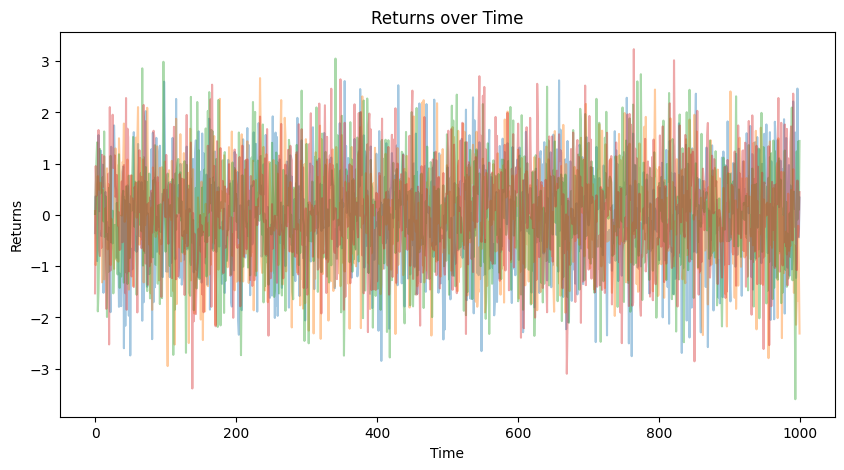

In [28]:
fig = plt.figure(figsize=(10, 5))
plt.plot(returns.T, alpha=0.4)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Returns over Time')
plt.show()

Here, we used returns over time because this is a better way to observe stock performance rather than their raw price. 
Raw prices can vary drastically from one stock to another. 

Note that the return series above can be used to create a wide range of portfolios which should have different returns and risks (standard deviation). 
Now, I'll try to simulate "a wide range of portfolios" with a function. 
However, I will make the assumption that all capital will be invested. 
Hence, the return vector has to sum to one.

In [58]:
def get_weights(n, display=False):
    k = np.random.rand(n)
    
    total = 0
    for num in k:
        total += num

    if display: 
        print(f'The weights are {k / sum(k)}.')
        print(f"The sum is {total}")
        print()
    
    return k / sum(k)

get_weights(n_assets, display=True)
get_weights(n_assets, display=True)

The weights are [0.46212961 0.01788726 0.06520255 0.45478057]
The sum is 1.2571376265840222

The weights are [0.21145831 0.49084507 0.09999738 0.19769924]
The sum is 1.9954976269264875



array([0.21145831, 0.49084507, 0.09999738, 0.19769924])

Every time you run the cell above, notice that the output would always change in value. 

Here, I am looking at at how the portfolios would perform by:
1. calculate the mean returns
2. calculate the volatility (standard deviation)

For better illustration, we will only plot the portfolios with a standard deviation less than 2. 
If it would be greater than that, the graph itself would look noisy.

In [49]:
def get_performance(returns):
    p = np.asmatrix(np.mean(returns, axis=1)) # vector of mean returns
    w = np.asmatrix(get_weights(returns.shape[0])) # vector of weights
    c = np.asmatrix(np.cov(returns)) # covariance of the returns

    mu = w * p.T
    sigma = np.sqrt(w * c * w.T)

    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

For some points of confusion:

For `mu = w * p.T`, we are doing p.T because we want the result to only have one value. 
For context,
- `p.T` transforms a row matrix into a column matrix.
- `w` is a row matrix.
- if we multiply a [1, 4] and a [4, 1] matrix, we get a [1, 1] matrix.

For `sigma = np.sqrt(w * c * w.T)`, we are getting the standard deviation. 
Standard deviation ($\sigma$) is the square root of the variance.

## References

1. https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/?fbclid=IwY2xjawMo8clleHRuA2FlbQIxMQABHuyZdkuwk_uY9jgZoTi8l5EPdpAtEDekC4BmZpE0zILe1THV1r_8HoJgTA2K_aem_JoK2f6vaXhMcEpMEe0eu8Q

2. https://github.com/RichardS0268/Markowitz-Portfolio-theory

The HM model is also called mean-variance model due to the fact that it is based on expected returns (mean) and the standard deviation (variance) of the various portfolios.